**Data Exploration**

In [1]:
# Utility Imports
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Mode-building Imports
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


# Reading in the data.
df = pd.read_csv('../data-major-cities/train.csv')
now = datetime.now()

def clean(text):
    """"
        The clean function takes in one argument (text) and returns a modified/cleaned list of word values.
    """
    
    # texts is a list of words from the argument 'text'
    texts = text.strip("{}").replace(" ","_").replace("\"","").replace(","," ").lower().split(" ")
    tokens = []
    
    # removing redundant values from the texts list
    for x in texts:
        if x != "translation_missing:_en.hosting_amenity_49" and x != "translation_missing:_en.hosting_amenity_50" and len(x) >=1:
            tokens.append(x)
    return tokens

def get_days(text):
    """
        get_days has one argument (text)
        
        It is used to create a new feature in the data set 'host_since_days'
        
    """
    if type(text) == float:
        return 0
    date = text.split('-')
    days = ((now.year - int(date[0])) * 365) + ((now.month - int(date[1])) * 30) + (int(date[2]))
    return days

def get_token_doc():
    """
        Applied to the same column as clean. This takes in a list of words and converts to a set to remove repeated values.
        
        Doc takes in a word and gives it a doc object number valuation (enumerate)
    """
    tokens = set()
    for lists in df['amenities']:
        for x in lists:
            tokens.add(x)
    token_doc = {}
    for i, x in enumerate(tokens):
        token_doc[x] = i
    return token_doc

def tokenize(word_list,token_doc):
    """
        Encoding word_list (amenities) with new number values for tokenization.
    """
    encoded_list = []
    for word in word_list:
        encoded_list.append(token_doc[word])
    return encoded_list

# Feature engineering

# The daily price of the AirBnb listing.
df['price'] = df['log_price'].apply(lambda x : round(np.exp(x)))

# Cleaning the amenities column.
df['amenities'] = df['amenities'].apply(clean)

# Tokenizing the amenities column.
token_doc = get_token_doc()
df['amenities'] = df['amenities'].apply(tokenize,token_doc=token_doc)

# Applying the get_days function to create a new feature = total number of hosted days.
df['host_since_days'] = df['host_since'].apply(get_days)

# Dropping redundant columns.
df.drop(columns=['host_since','log_price','id','latitude','longitude','name','description','thumbnail_url','review_scores_rating','number_of_reviews','host_has_profile_pic','host_response_rate','last_review','first_review'],inplace=True)

# A new column: Is the room isntantly bookable.
df['instant_bookable'].replace(('f','t'),("False",'True'),inplace=True)

# A new column: is the hosts' identity verified.
df['host_identity_verified'].replace(('f','t'),("False",'True'),inplace=True)

# Dropping null values
df = df.dropna(axis=0)

In [44]:
# Splitting the data
Y = df['price']
X = df.drop(columns=['price'])

**Visualizations**

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'host_since_days'}>, <AxesSubplot:>]],
      dtype=object)

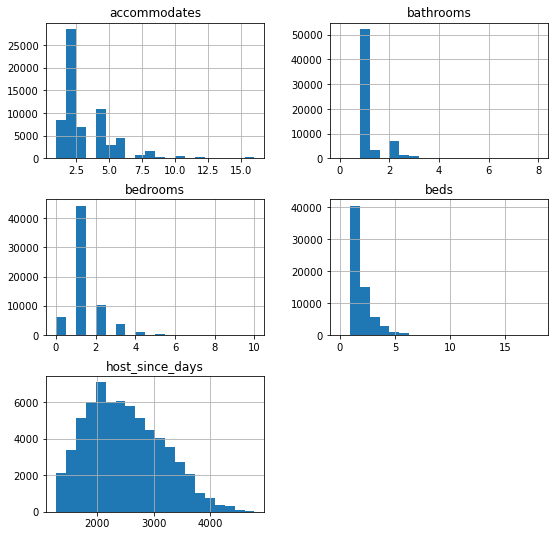

In [45]:
# Plotting the targeted features.
X.hist(figsize=(9,9),bins = 20)

In [46]:
df['target/price'] = df['price']
df.drop(columns=['price'],inplace=True)

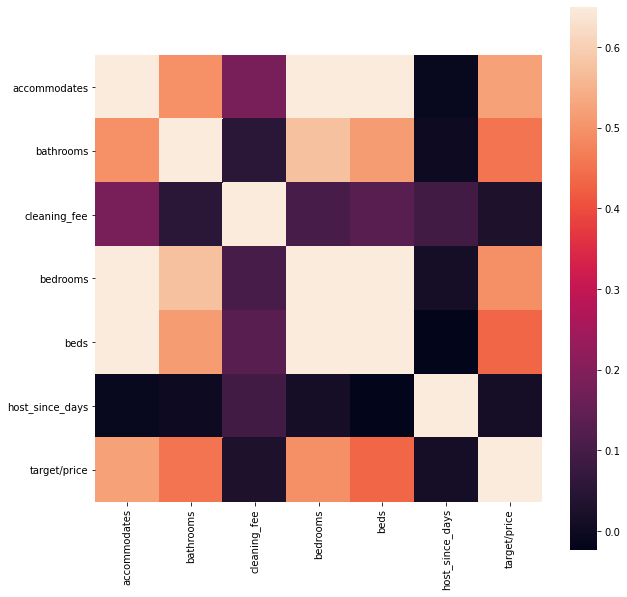

In [47]:

x = df.corr()
figure = plt.figure(figsize=(10,10))
sns.heatmap(x,vmax=0.65,square=True)
plt.show()


In [51]:
input_dims = len(X.columns)

model = Sequential()

model.add(Dense(input_dims,input_dim=input_dims, activation="relu", kernel_initializer='normal'))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# model.fit(X, Y, epochs=100, batch_size=10, verbose=1)


In [49]:
X

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,neighbourhood,zipcode,bedrooms,beds,host_since_days
0,Apartment,Entire home/apt,"[71, 1, 20, 35, 14, 24, 120, 13]",3,1.0,Real Bed,strict,True,NYC,True,False,Brooklyn Heights,11201,1.0,1.0,3341
1,Apartment,Entire home/apt,"[71, 1, 20, 35, 14, 127, 22, 43, 123, 24, 19, ...",7,1.0,Real Bed,strict,True,NYC,False,True,Hell's Kitchen,10019,3.0,3.0,1419
2,Apartment,Entire home/apt,"[69, 34, 71, 1, 20, 62, 52, 35, 14, 43, 86, 12...",5,1.0,Real Bed,moderate,True,NYC,True,True,Harlem,10027,1.0,3.0,1670
3,House,Entire home/apt,"[69, 34, 87, 71, 20, 47, 52, 35, 127, 22, 43, ...",4,1.0,Real Bed,flexible,True,SF,True,False,Lower Haight,94117.0,2.0,2.0,2209
4,Apartment,Entire home/apt,"[69, 87, 71, 1, 20, 95, 35, 43, 86, 123, 24, 19]",2,1.0,Real Bed,moderate,True,DC,True,True,Columbia Heights,20009,0.0,1.0,2221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,Apartment,Private room,[],1,1.0,Real Bed,flexible,False,NYC,True,False,Williamsburg,11206.0,1.0,1.0,2974
74107,Apartment,Entire home/apt,"[69, 34, 87, 71, 20, 72, 35, 14, 127, 22, 43, ...",4,2.0,Real Bed,moderate,True,LA,False,False,Hermosa Beach,90254,2.0,4.0,1798
74108,Apartment,Entire home/apt,"[69, 87, 71, 1, 20, 21, 17, 52, 35, 14, 127, 2...",5,1.0,Real Bed,moderate,True,NYC,True,True,Williamsburg,11206.0,2.0,2.0,3380
74109,Apartment,Entire home/apt,"[69, 71, 1, 20, 35, 127, 22, 43, 86, 24, 19, 1...",2,1.0,Real Bed,strict,True,NYC,False,True,West Village,10011,0.0,2.0,1327


In [28]:
new model

[69, 34, 71, 1, 20, 62, 52, 35, 14, 43, 86, 123, 24, 19, 121, 120, 13, 124]